In [26]:
# Incidence du syndrome grippal

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [38]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [39]:
data_file = "syndrome-grippal.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [40]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202341          3   68198   58031.0   78365.0    103        88.0   
1     202340          3   69858   60925.0   78791.0    105        92.0   
2     202339          3   72003   63452.0   80554.0    108        95.0   
3     202338          3   63218   55227.0   71209.0     95        83.0   
4     202337          3   49085   42079.0   56091.0     74        63.0   
5     202336          3   38247   32237.0   44257.0     58        49.0   
6     202335          3   31695   26013.0   37377.0     48        39.0   
7     202334          3   26663   21057.0   32269.0     40        32.0   
8     202333          3   19144   13161.0   25127.0     29        20.0   
9     202332          3   14641   10285.0   18997.0     22        15.0   
10    202331          3   15286   10705.0   19867.0     23        16.0   
11    202330          3   13205    8647.0   17763.0     20        13.0   
12    202329          3   11122    7113.0   15131.0     17        11.0   
13    202328          3    9179    5703.0   12655.0     14         9.0   
14    202327          3    8999    5763.0   12235.0     14         9.0   
15    202326          3    9023    5934.0   12112.0     14         9.0   
16    202325          3   10090    6739.0   13441.0     15        10.0   
17    202324          3   11308    7639.0   14977.0     17        11.0   
18    202323          3   14300   10661.0   17939.0     22        17.0   
19    202322          3   18303   13822.0   22784.0     28        21.0   
20    202321          3   16460   12188.0   20732.0     25        19.0   
21    202320          3   16162   11963.0   20361.0     24        18.0   
22    202319          3   16901   12577.0   21225.0     25        18.0   
23    202318          3   19929   15402.0   24456.0     30        23.0   
24    202317          3   27007   21779.0   32235.0     41        33.0   
25    202316          3   27875   22767.0   32983.0     42        34.0   
26    202315          3   37455   30993.0   43917.0     56        46.0   
27    202314          3   48060   40671.0   55449.0     72        61.0   
28    202313          3   64859   56800.0   72918.0     98        86.0   
29    202312          3   72750   64499.0   81001.0    109        97.0   
...      ...        ...     ...       ...       ...    ...         ...   
2003  198521          3   26096   19621.0   32571.0     47        35.0   
2004  198520          3   27896   20885.0   34907.0     51        38.0   
2005  198519          3   43154   32821.0   53487.0     78        59.0   
2006  198518          3   40555   29935.0   51175.0     74        55.0   
2007  198517          3   34053   24366.0   43740.0     62        44.0   
2008  198516          3   50362   36451.0   64273.0     91        66.0   
2009  198515          3   63881   45538.0   82224.0    116        83.0   
2010  198514          3  134545  114400.0  154690.0    244       207.0   
2011  198513          3  197206  176080.0  218332.0    357       319.0   
2012  198512          3  245240  223304.0  267176.0    445       405.0   
2013  198511          3  276205  252399.0  300011.0    501       458.0   
2014  198510          3  353231  326279.0  380183.0    640       591.0   
2015  198509          3  369895  341109.0  398681.0    670       618.0   
2016  198508          3  389886  359529.0  420243.0    707       652.0   
2017  198507          3  471852  432599.0  511105.0    855       784.0   
2018  198506          3  565825  518011.0  613639.0   1026       939.0   
2019  198505          3  637302  592795.0  681809.0   1155      1074.0   
2020  198504          3  424937  390794.0  459080.0    770       708.0   
2021  198503          3  213901  174689.0  253113.0    388       317.0   
2022  198502          3   97586   80949.0  114223.0    177       147.0   
2023  198501          3   85489   65918.0  105060.0    155       120.0   
2024  198452          3   84830   60602.0  109058.0    154       110.0   
2025  198451

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [41]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1796  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1796        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [42]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202341          3   68198   58031.0   78365.0    103        88.0   
1     202340          3   69858   60925.0   78791.0    105        92.0   
2     202339          3   72003   63452.0   80554.0    108        95.0   
3     202338          3   63218   55227.0   71209.0     95        83.0   
4     202337          3   49085   42079.0   56091.0     74        63.0   
5     202336          3   38247   32237.0   44257.0     58        49.0   
6     202335          3   31695   26013.0   37377.0     48        39.0   
7     202334          3   26663   21057.0   32269.0     40        32.0   
8     202333          3   19144   13161.0   25127.0     29        20.0   
9     202332          3   14641   10285.0   18997.0     22        15.0   
10    202331          3   15286   10705.0   19867.0     23        16.0   
11    202330          3   13205    8647.0   17763.0     20        13.0   
12    202329          3   11122    7113.0   15131.0     17        11.0   
13    202328          3    9179    5703.0   12655.0     14         9.0   
14    202327          3    8999    5763.0   12235.0     14         9.0   
15    202326          3    9023    5934.0   12112.0     14         9.0   
16    202325          3   10090    6739.0   13441.0     15        10.0   
17    202324          3   11308    7639.0   14977.0     17        11.0   
18    202323          3   14300   10661.0   17939.0     22        17.0   
19    202322          3   18303   13822.0   22784.0     28        21.0   
20    202321          3   16460   12188.0   20732.0     25        19.0   
21    202320          3   16162   11963.0   20361.0     24        18.0   
22    202319          3   16901   12577.0   21225.0     25        18.0   
23    202318          3   19929   15402.0   24456.0     30        23.0   
24    202317          3   27007   21779.0   32235.0     41        33.0   
25    202316          3   27875   22767.0   32983.0     42        34.0   
26    202315          3   37455   30993.0   43917.0     56        46.0   
27    202314          3   48060   40671.0   55449.0     72        61.0   
28    202313          3   64859   56800.0   72918.0     98        86.0   
29    202312          3   72750   64499.0   81001.0    109        97.0   
...      ...        ...     ...       ...       ...    ...         ...   
2003  198521          3   26096   19621.0   32571.0     47        35.0   
2004  198520          3   27896   20885.0   34907.0     51        38.0   
2005  198519          3   43154   32821.0   53487.0     78        59.0   
2006  198518          3   40555   29935.0   51175.0     74        55.0   
2007  198517          3   34053   24366.0   43740.0     62        44.0   
2008  198516          3   50362   36451.0   64273.0     91        66.0   
2009  198515          3   63881   45538.0   82224.0    116        83.0   
2010  198514          3  134545  114400.0  154690.0    244       207.0   
2011  198513          3  197206  176080.0  218332.0    357       319.0   
2012  198512          3  245240  223304.0  267176.0    445       405.0   
2013  198511          3  276205  252399.0  300011.0    501       458.0   
2014  198510          3  353231  326279.0  380183.0    640       591.0   
2015  198509          3  369895  341109.0  398681.0    670       618.0   
2016  198508          3  389886  359529.0  420243.0    707       652.0   
2017  198507          3  471852  432599.0  511105.0    855       784.0   
2018  198506          3  565825  518011.0  613639.0   1026       939.0   
2019  198505          3  637302  592795.0  681809.0   1155      1074.0   
2020  198504          3  424937  390794.0  459080.0    770       708.0   
2021  198503          3  213901  174689.0  253113.0    388       317.0   
2022  198502          3   97586   80949.0  114223.0    177       147.0   
2023  198501          3   85489   65918.0  105060.0    155       120.0   
2024  198452          3   84830   60602.0  109058.0    154       110.0   
2025  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [43]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [44]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [45]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

In [46]:
sorted_data['inc'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

In [47]:
sorted_data['inc'][-200:].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [48]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [49]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

In [50]:
yearly_incidence.plot(style='*')

TypeError: Empty 'DataFrame': no numeric data to plot

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [51]:
yearly_incidence.sort_values()

1999    1214713082934385324913033696810837170752023524...
1998    1386208617993226184251314542323110189132921693...
2000    1478264071499757760033348191754312430285532418...
1986    1695874882261140389302152798622219276053981949...
2007    1773001572217011071786253289451195013920166732...
2002    1899900299043994663802597362540718113202411896...
1996    1946700905188724963659489513123184991624514980...
2008    1965132418933531177110014494769159851351712987...
2019    2048183919621368150632154915734971747409804877...
2001    2159140516905188559029902243741719338272374002...
1987    2247102731155762105879182159982661528665335163...
2014    2270470947401889129146395027932453719794123911...
2020    2337159215931672101022953172489770918505712277...
2012    2409259024213312417846068365140071702114053748...
1992    2464625165420992372238024297460143732674028185...
2013    2696638164923858827763847775147152025717873186...
1990    2721711479406039466147691202218296246223145343...
2016    284515

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

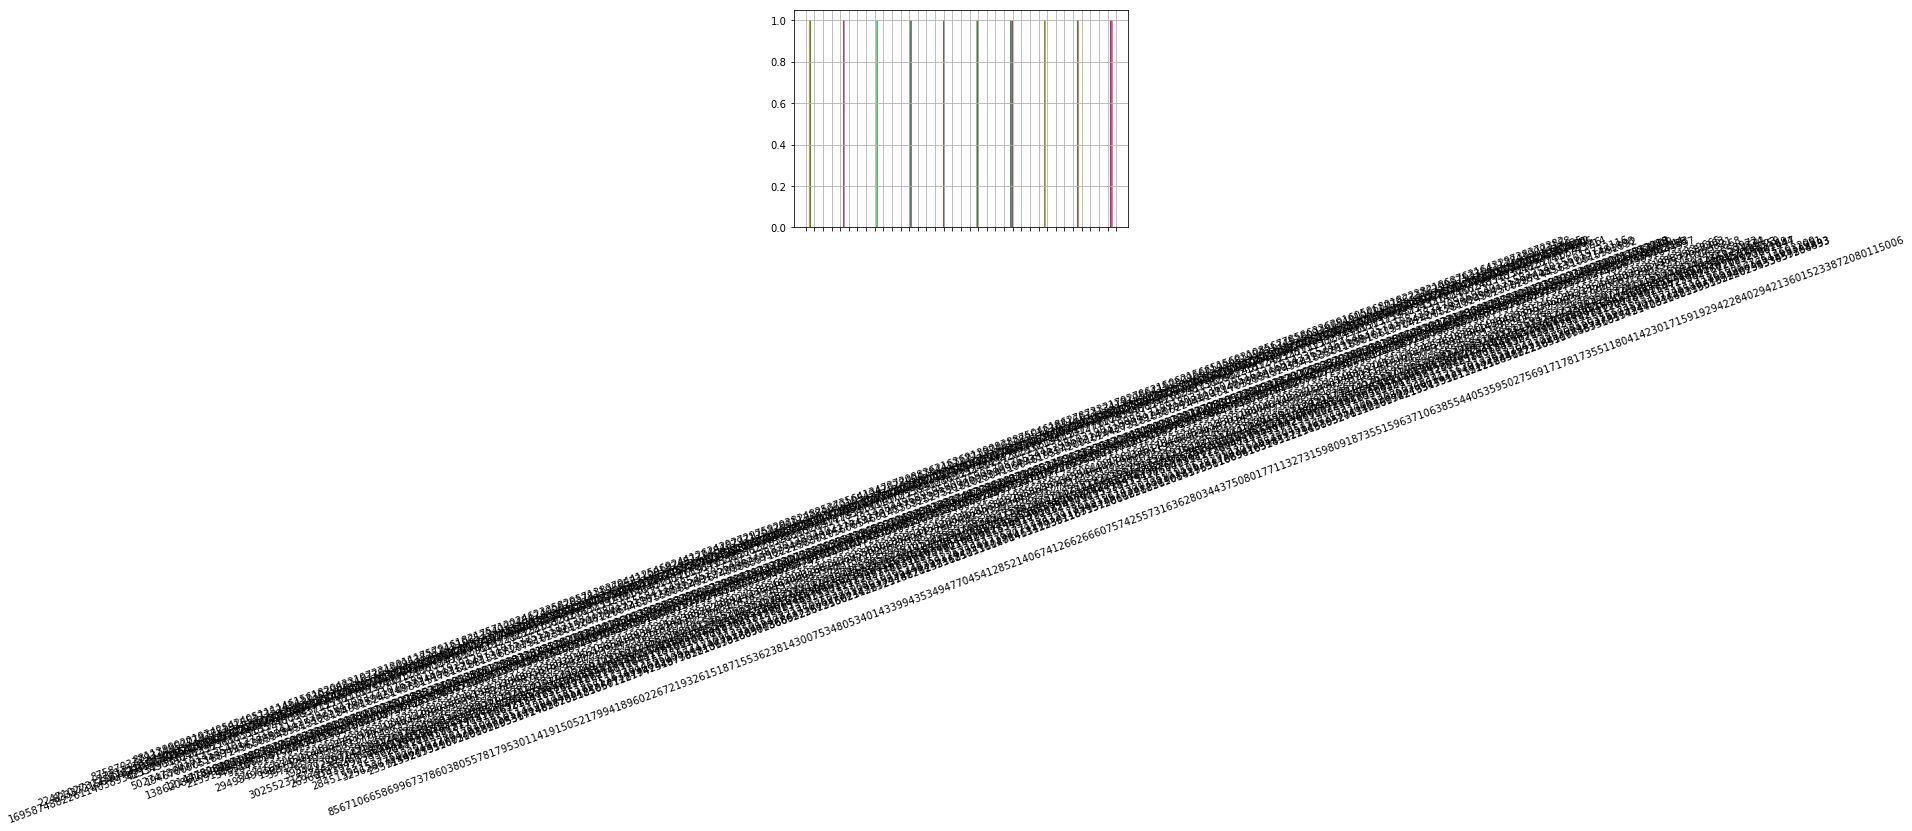

In [52]:
yearly_incidence.hist(xrot=20)